USING A BAR FUNCTION TO DRAW A BAR GRAPH:

A rudimentary bar graph showing the relationship between an arraw of tags or letters, and numbers that represent a set of values corresponding to said tags. 

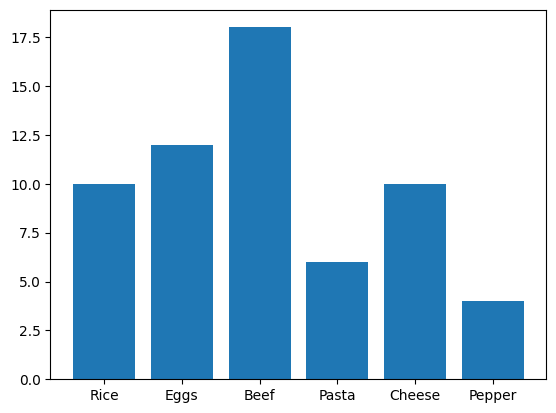

In [10]:
import matplotlib.pyplot as plt
import numpy as np

item = np.array(["Rice", "Eggs", "Beef", "Pasta", "Cheese", "Pepper"])
tag = np.array([10, 12, 18, 6, 10, 4])

plt.bar(item,tag)
plt.show()

The bar can also be represented horizontally:

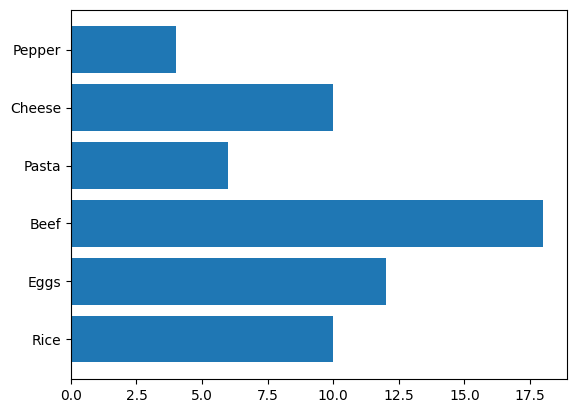

In [11]:
import matplotlib.pyplot as plt
import numpy as np

item = np.array(["Rice", "Eggs", "Beef", "Pasta", "Cheese", "Pepper"])
tag = np.array([10, 12, 18, 6, 10, 4])

plt.barh(item,tag)
plt.show()

USING THE SCATTER FUNCTION TO PLOT A SCATTER GRAPH:

The scatter function uses two arrays of the same length, each one correlating with the x-axis and y-axis respectively.

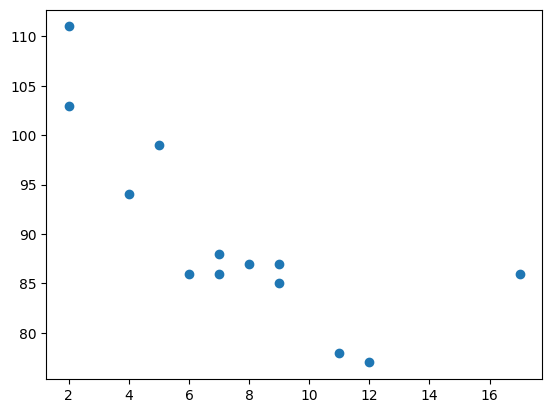

In [9]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([7,7,8,7,2,17,2,9,6,11,12,9,6])
y = np.array([74,82,98,88,111,86,103,87,94,78,77,85,86])

plt.scatter(x, y)
plt.show()

CREATING A HISTOGRAPH USING THE HIST FUNCTION


*To simplify the process, we use NumPy to randomly generate an array of 340 values that are centered around 150, with a standard deviation of 8*


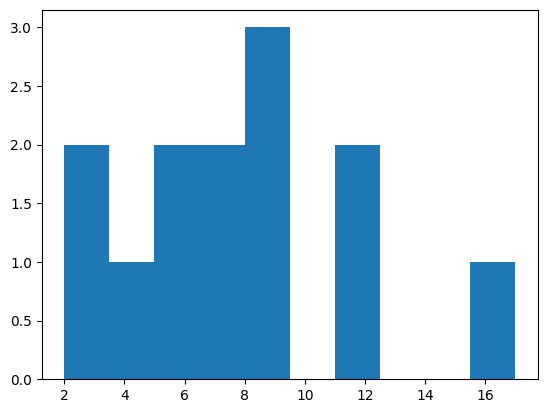

In [13]:
import numpy as np

h = np.random.normal(150, 8, 340)

plt.hist(x)
plt.show()

CREATING A PIE CHART USING THE PIE FUNCTION

See reference

Below is a pie chart representing Nvidia's 3Q Fiscal 2021 Revenue by segment

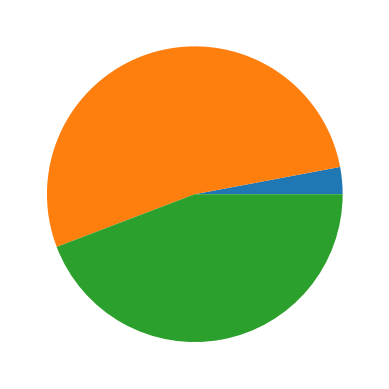

In [16]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([2.8, 50.1, 41.9])


plt.pie(y)
plt.show() 

USING A SPOTTED LINE GRAPH FUNCTION

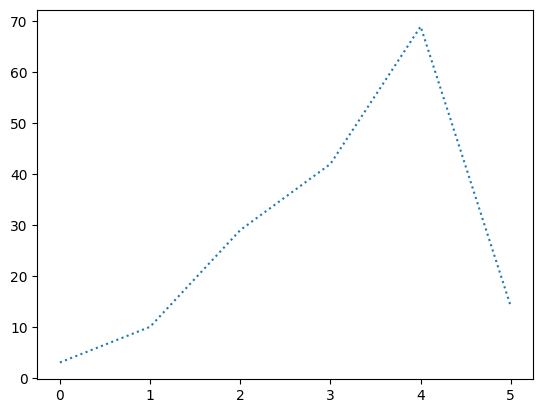

In [17]:
import matplotlib.pyplot as plt
import numpy as np

point = np.array([3, 10, 29, 42, 69, 14])

plt.plot(point, linestyle = 'dotted')
plt.show()

PLOT WITH LABELS

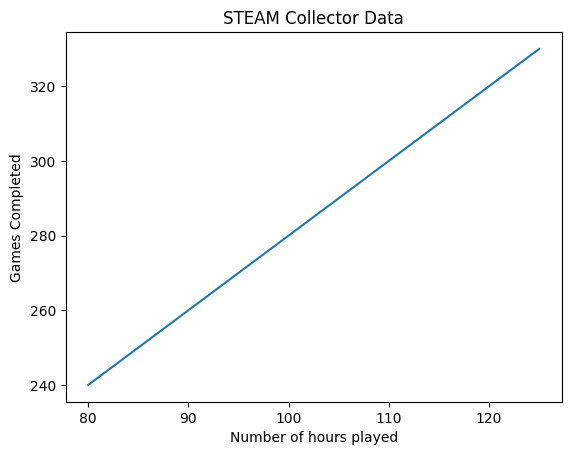

In [18]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([80, 85, 90, 95, 100, 105, 110, 115, 120, 125])
y = np.array([240, 250, 260, 270, 280, 290, 300, 310, 320, 330])

plt.plot(x, y)

plt.title("STEAM Collector Data")
plt.xlabel("Number of hours played")
plt.ylabel("Games Completed")

plt.show()